# Rotation Example

In [1]:
import skimage.io

import numpy as np
import sympy

import pystencils
import pystencils.plot as plt

In this example, we will apply a matrix transform to an image. First load an image of Lenna.

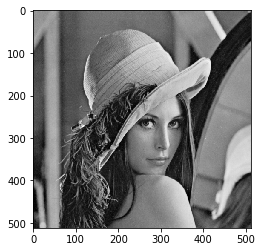

In [2]:
lenna = skimage.io.imread(
    "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png", as_gray=True).astype(np.float32)

plt.imshow(lenna, cmap="gray")

 Create the fields as you regularly do.

In [3]:
x, y = pystencils.fields('x, y:  float32[2d]')

 First, we set the coordinate center of x and y to the center of the fields

In [4]:
x.set_coordinate_origin_to_field_center()
y.set_coordinate_origin_to_field_center()

 Rotate around center when setting coordinates origins to field centers

In [5]:
rotation_angle = sympy.pi / 5
transform_matrix = sympy.rot_axis3(rotation_angle)[:2, :2]

 Generic matrix transform works like that (for rotation it would be more clever to use transform_matrix.T)

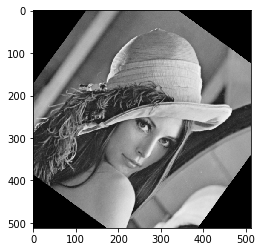

In [6]:
inverse_matrix = transform_matrix.inv()
input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

assignments = pystencils.AssignmentCollection({
    y.center(): x.interpolated_access(input_coordinate)
})


kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)


plt.imshow(rotated, cmap="gray")

 If distance in input field is twice as close, we will see a smaller image

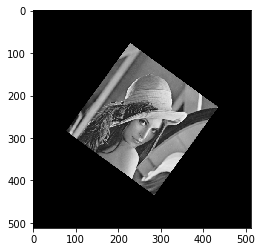

In [7]:
x.coordinate_transform /= 2

input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

from sympy.abc import a, b
assignments = pystencils.AssignmentCollection({
    y.center(): x.interpolated_access(input_coordinate)
})


kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)

plt.imshow(rotated, cmap="gray")

 Conversely, if output field has samples 3 times closer we will see a bigger image

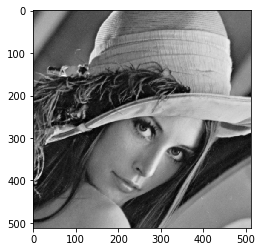

In [8]:
y.coordinate_transform /= 3

input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

assignments = pystencils.AssignmentCollection({
    y.center(): x.interpolated_access(input_coordinate)
})

kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)

plt.imshow(rotated, cmap="gray")

On CPU the interpolation is realized with stencils accesses:

In [9]:
pystencils.show_code(kernel)

FUNC_PREFIX void kernel(float * RESTRICT const _data_x, float * RESTRICT _data_y, int64_t const _size_x_0, int64_t const _size_x_1, int64_t const _size_y_0, int64_t const _size_y_1, int64_t const _stride_x_0, int64_t const _stride_x_1, int64_t const _stride_y_0, int64_t const _stride_y_1)
{
   for (int ctr_0 = 0; ctr_0 < _size_y_0; ctr_0 += 1)
   {
      float * RESTRICT _data_y_00 = _data_y + _stride_y_0*ctr_0;
      for (int ctr_1 = 0; ctr_1 < _size_y_1; ctr_1 += 1)
      {
         float * RESTRICT _data_xa5a9242e78b86fa5 = _data_x + _stride_x_0*((int64_t)(floor((0.5)*_size_x_0 + 2*(0.25 + (0.25)*2.2360679774997898)*(-0.166666666666667*_size_y_0 + (0.333333333333333)*ctr_0)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373) - 2*0.58778525229247314*(-0.166666666666667*_size_y_1 + (0.333333333333333)*ctr_1)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373))));
         float * RESTRICT _data_x3b1661845f7da135 = _data_x + _stride_x_0*((int64_t)(floor((0.5)*_size_x_0 + 2*(0.25 + (0.25)*2.2360679774997898)*(-0.166666666666667*_size_y_0 + (0.333333333333333)*ctr_0)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373) - 2*0.58778525229247314*(-0.166666666666667*_size_y_1 + (0.333333333333333)*ctr_1)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373)) + 1));
         _data_y_00[_stride_y_1*ctr_1] = ((0.0 <= floor(_size_x_0*0.5 + _size_y_0*-0.0833333333333333*2.2360679774997898 + _size_y_0*-0.0833333333333333 + _size_y_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) && 0.0 <= floor(_size_x_1*0.5 + _size_y_0*0.58778525229247314*-0.333333333333333 + _size_y_1*-0.0833333333333333*2.2360679774997898 + _size_y_1*-0.0833333333333333 + ctr_0*0.58778525229247314*0.666666666666667 + ctr_1*0.166666666666667*2.2360679774997898 + ctr_1*0.166666666666667) && _size_x_0 > floor(_size_x_0*0.5 + _size_y_0*-0.0833333333333333*2.2360679774997898 + _size_y_0*-0.0833333333333333 + _size_y_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) && _size_x_1 > floor(_size_x_1*0.5 + _size_y_0*0.58778525229247314*-0.333333333333333 + _size_y_1*-0.0833333333333333*2.2360679774997898 + _size_y_1*-0.0833333333333333 + ctr_0*0.58778525229247314*0.666666666666667 + ctr_1*0.166666666666667*2.2360679774997898 + ctr_1*0.166666666666667)) ? (sqrt((_size_x_0*_size_x_0)*0.25 + _size_x_0*_size_y_0*-0.0833333333333333*2.2360679774997898 + _size_x_0*_size_y_0*-0.0833333333333333 + _size_x_0*_size_y_1*0.58778525229247314*0.333333333333333 + _size_x_0*ctr_0*0.166666666666667*2.2360679774997898 + _size_x_0*ctr_0*0.166666666666667 + _size_x_0*ctr_1*0.58778525229247314*-0.666666666666667 - _size_x_0*floor(_size_x_0*0.5 + _size_y_0*-0.0833333333333333*2.2360679774997898 + _size_y_0*-0.0833333333333333 + _size_y_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) + (_size_y_0*_size_y_0)*0.0416666666666667 + (_size_y_0*_size_y_0)*0.0138888888888889*2.2360679774997898 + _size_y_0*_size_y_1*0.58778525229247314*-0.0555555555555556*2.2360679774997898 + _size_y_0*_size_y_1*0.58778525229247314*-0.0555555555555556 + _size_y_0*ctr_0*-0.0555555555555556*2.2360679774997898 + _size_y_0*ctr_0*-0.166666666666667 + _size_y_0*ctr_1*0.58778525229247314*0.111111111111111*2.2360679774997898 + _size_y_0*ctr_1*0.58778525229247314*0.111111111111111 + _size_y_0*0.166666666666667*2.2360679774997898*floor(_size_x_0*0.5 + _size_y_0*-0.0833333333333333*2.2360679774997898 + _size_y_0*-0.0833333333333333 + _size_y_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) + _size_y_0*0.166666666666667*floor(_size_x_0*0.5 + _size_y_0*-0.0833333333333333*2.236067977499

On GPU we use textures.

In [10]:
gpu_kernel = pystencils.create_kernel(assignments, target='gpu').compile()

pystencils.show_code(gpu_kernel)

texture<float, cudaTextureType2D, cudaReadModeElementType> x_texture_35c887ee7804e9b7;

FUNC_PREFIX __launch_bounds__(256) void kernel(float * RESTRICT _data_y, int64_t const _size_x_0, int64_t const _size_x_1, int64_t const _size_y_0, int64_t const _size_y_1, int64_t const _stride_y_0, int64_t const _stride_y_1)
{
   if (blockDim.x*blockIdx.x + threadIdx.x < _size_y_0 && blockDim.y*blockIdx.y + threadIdx.y < _size_y_1)
   {
      const int64_t ctr_0 = blockDim.x*blockIdx.x + threadIdx.x;
      const int64_t ctr_1 = blockDim.y*blockIdx.y + threadIdx.y;
      float * RESTRICT _data_y_10 = _data_y + _stride_y_1*ctr_1;
      _data_y_10[_stride_y_0*ctr_0] = tex2D(x_texture_35c887ee7804e9b7, _size_x_1*0.5 + (_size_y_0*-0.166666666666667 + ctr_0*0.333333333333333)*0.58778525229247314*2.0/(0.65450849718747373 - 0.125*2.2360679774997898 + 0.625) + (_size_y_1*-0.166666666666667 + ctr_1*0.333333333333333)*(0.25*2.2360679774997898 + 0.25)*2.0/(0.65450849718747373 - 0.125*2.2360679774997898 + 0.625) + 0.5, _size_x_0*0.5 + (_size_y_0*-0.166666666666667 + ctr_0*0.333333333333333)*(0.25*2.2360679774997898 + 0.25)*2.0/(0.65450849718747373 - 0.125*2.2360679774997898 + 0.625) + (_size_y_1*-0.166666666666667 + ctr_1*0.333333333333333)*0.58778525229247314*-2.0/(0.65450849718747373 - 0.125*2.2360679774997898 + 0.625) + 0.5);
   } 
}

Except if you opt-out via `use_textures_for_interpolation=False`

In [11]:
gpu_kernel = pystencils.create_kernel(assignments, target='gpu', use_textures_for_interpolation=False).compile()

pystencils.show_code(gpu_kernel)

FUNC_PREFIX __launch_bounds__(256) void kernel(float * RESTRICT const _data_x, float * RESTRICT _data_y, int64_t const _size_x_0, int64_t const _size_x_1, int64_t const _size_y_0, int64_t const _size_y_1, int64_t const _stride_x_0, int64_t const _stride_x_1, int64_t const _stride_y_0, int64_t const _stride_y_1)
{
   if (blockDim.x*blockIdx.x + threadIdx.x < _size_x_0 && blockDim.y*blockIdx.y + threadIdx.y < _size_x_1)
   {
      const int64_t ctr_0 = blockDim.x*blockIdx.x + threadIdx.x;
      const int64_t ctr_1 = blockDim.y*blockIdx.y + threadIdx.y;
      float * RESTRICT _data_y_10 = _data_y + _stride_y_1*ctr_1;
      float * RESTRICT _data_xa77b70f806e29493 = _data_x + _stride_x_1*((int64_t)(floor((0.5)*_size_x_1 + 2*0.58778525229247314*(-0.166666666666667*_size_y_0 + (0.333333333333333)*ctr_0)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373) + 2*(0.25 + (0.25)*2.2360679774997898)*(-0.166666666666667*_size_y_1 + (0.333333333333333)*ctr_1)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373)) + 1));
      float * RESTRICT _data_x588a15c3e7244cbb = _data_x + _stride_x_1*((int64_t)(floor((0.5)*_size_x_1 + 2*0.58778525229247314*(-0.166666666666667*_size_y_0 + (0.333333333333333)*ctr_0)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373) + 2*(0.25 + (0.25)*2.2360679774997898)*(-0.166666666666667*_size_y_1 + (0.333333333333333)*ctr_1)/(-0.125*2.2360679774997898 + 0.625 + 0.65450849718747373))));
      _data_y_10[_stride_y_0*ctr_0] = ((0.0 <= floor(_size_x_0*0.58778525229247314*-0.333333333333333 + _size_x_1*-0.0833333333333333*2.2360679774997898 + _size_x_1*-0.0833333333333333 + _size_x_1*0.5 + ctr_0*0.58778525229247314*0.666666666666667 + ctr_1*0.166666666666667*2.2360679774997898 + ctr_1*0.166666666666667) && 0.0 <= floor(_size_x_0*-0.0833333333333333*2.2360679774997898 + _size_x_0*-0.0833333333333333 + _size_x_0*0.5 + _size_x_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) && _size_x_0 > floor(_size_x_0*-0.0833333333333333*2.2360679774997898 + _size_x_0*-0.0833333333333333 + _size_x_0*0.5 + _size_x_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) && _size_x_1 > floor(_size_x_0*0.58778525229247314*-0.333333333333333 + _size_x_1*-0.0833333333333333*2.2360679774997898 + _size_x_1*-0.0833333333333333 + _size_x_1*0.5 + ctr_0*0.58778525229247314*0.666666666666667 + ctr_1*0.166666666666667*2.2360679774997898 + ctr_1*0.166666666666667)) ? (sqrt((_size_x_0*_size_x_0)*-0.0833333333333333*2.2360679774997898 + (_size_x_0*_size_x_0)*-0.0833333333333333 + (_size_x_0*_size_x_0)*0.0416666666666667 + (_size_x_0*_size_x_0)*0.25 + (_size_x_0*_size_x_0)*0.0138888888888889*2.2360679774997898 + _size_x_0*_size_x_1*0.58778525229247314*-0.0555555555555556*2.2360679774997898 + _size_x_0*_size_x_1*0.58778525229247314*-0.0555555555555556 + _size_x_0*_size_x_1*0.58778525229247314*0.333333333333333 + _size_x_0*ctr_0*-0.0555555555555556*2.2360679774997898 + _size_x_0*ctr_0*-0.166666666666667 + _size_x_0*ctr_0*0.166666666666667*2.2360679774997898 + _size_x_0*ctr_0*0.166666666666667 + _size_x_0*ctr_1*0.58778525229247314*-0.666666666666667 + _size_x_0*ctr_1*0.58778525229247314*0.111111111111111*2.2360679774997898 + _size_x_0*ctr_1*0.58778525229247314*0.111111111111111 + _size_x_0*0.166666666666667*2.2360679774997898*floor(_size_x_0*-0.0833333333333333*2.2360679774997898 + _size_x_0*-0.0833333333333333 + _size_x_0*0.5 + _size_x_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666666666667 + ctr_1*0.58778525229247314*-0.666666666666667) + _size_x_0*0.166666666666667*floor(_size_x_0*-0.0833333333333333*2.2360679774997898 + _size_x_0*-0.0833333333333333 + _size_x_0*0.5 + _size_x_1*0.58778525229247314*0.333333333333333 + ctr_0*0.166666666666667*2.2360679774997898 + ctr_0*0.166666

Execution on GPU

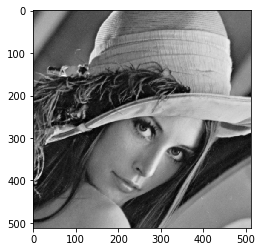

In [12]:
import pycuda.autoinit
from pycuda.gpuarray import to_gpu, zeros_like
lenna_gpu = to_gpu(lenna)
rotated_gpu = zeros_like(lenna_gpu)
gpu_kernel(x=lenna_gpu, y=rotated_gpu)

plt.imshow(rotated_gpu.get(), cmap='gray')